In [33]:
# Impor data di library python
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# Mencari data tersebut
data = sns.load_dataset('mpg')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
# Melakukan preview data mtcars
print(data.head()) 
print(data.describe())
print(data.info())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.8

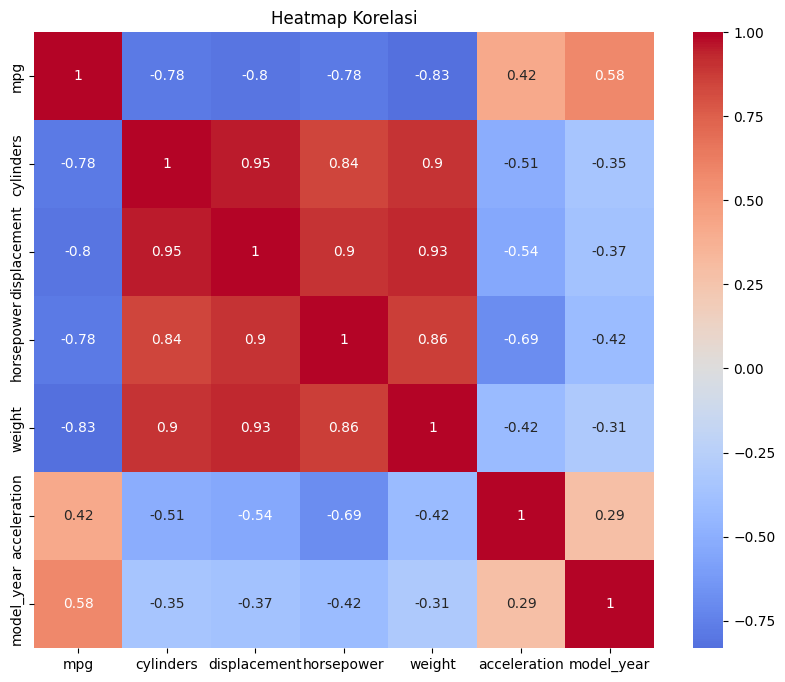

In [28]:
# Melakukan heatmap korelasi data
import matplotlib.pyplot as plt
corr = data.corr(numeric_only=True) 

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()


Shapiro-Wilk Test: Statistic=0.970405109060691, p-value=3.186686585088217e-07


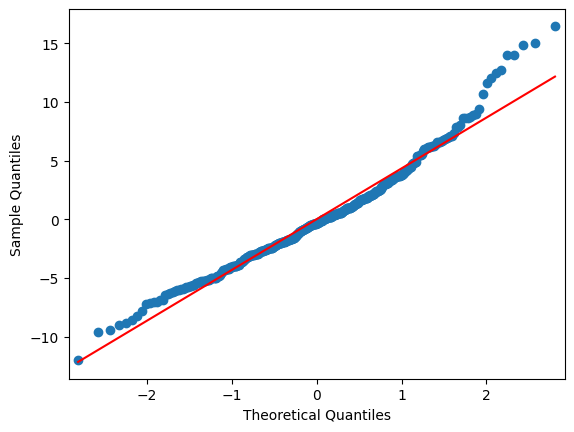

In [39]:
# Melakukann uji asumsi normalitas
X = sm.add_constant(data['weight'])  # Variabel independen
y = data['mpg']                     # Variabel dependen
model = sm.OLS(y, X).fit()

residuals = model.resid
stat, p = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p}')

sm.qqplot(residuals, line='s')
plt.show()

Breusch-Pagan Test: LM Statistic=23.678946043641197, p-value=1.1382094674311892e-06


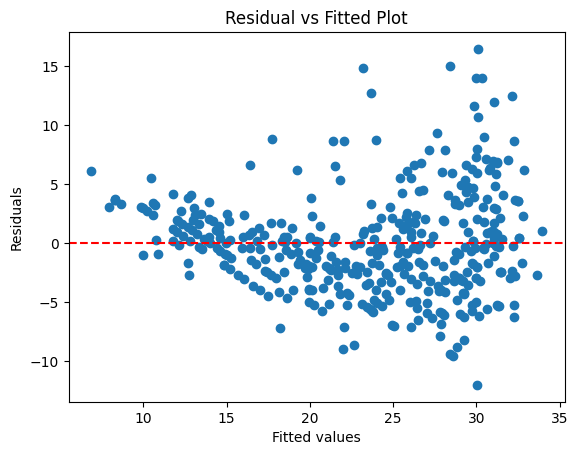

In [40]:
# Melakukan uji asumsi Heteroskedastisitas
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
print(f'Breusch-Pagan Test: LM Statistic={bp_test[0]}, p-value={bp_test[1]}')

plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot')
plt.show()

In [ ]:
# Melakukan uji asumsi Multikolinieritas
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_multi = data[['weight', 'horsepower']]
X_multi = sm.add_constant(X_multi)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

[13.334600593074704, 0.9999999999999998]


In [46]:
# Melakukan uji asumsi autokorelasi
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw}')

Durbin-Watson Statistic: 0.7966896816392192


In [ ]:
# Melakukan Pemodelan Regresi di Python
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          2.97e-103
Time:                        09:45:39   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

In [48]:
# Melakukan R-Square
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

R-squared: 0.6917929800341576


In [49]:
# Melakukan interprestasi model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          2.97e-103
Time:                        09:46:45   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0

In [ ]:
# Melakukan interprestasi model
print(model.summary())
"""
Interpretasi:
1. Model regresi berganda: 46.3174 - 0.0077 * wt 
2. Setiap penambahan 1 unit berat (wt), mpg berkurang 0.0077
3. R-squared: 0.692
3. P-value: < 0.05 berarti signifikan
"""

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          2.97e-103
Time:                        09:52:47   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.0